<a href="https://colab.research.google.com/github/BingHungLee/Heat_Transfer/blob/master/%5BProperty%5D_kg_kg_da_to_g_Nm3_moist_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
Tdb = 80
RH = 100
W = 0.547 #kg-water/kg-da
md = 28.965 #[kg/kmol], molar mass of dry air
mw = 18.016 #[kg/kmol], molar mass of water vapor
water_weight = 0.547 #[kg]
dry_air_weight = 1 #[kg]

water_kmol= water_weight/ mw #[kmol]
dry_air_kmol = dry_air_weight/ md [kmol]
water_v_percentage = water_kmol/(water_kmol+dry_air_kmol)
dry_air_v_percentage = 1 - water_v_percentage

print("water_v_percentage",water_v_percentage)
print("dry_air_v_percentage",dry_air_v_percentage)

density_dry_air = 1.29227 #[kg/Nm3]
density_water = 0.80378 #[kg/Nm3]
density_moist_air = (density_dry_air*dry_air_v_percentage+density_water*water_v_percentage) #[kg/Nm3]

print("density_moist_air ",density_moist_air ,"kg/Nm3")

water_v_percentage 0.46792447870789766
dry_air_v_percentage 0.5320755212921023
density_moist_air  1.0636935713959792 kg/Nm3


In [8]:
from google.colab import files
uploaded = files.upload()
import cv2
import numpy as np
from matplotlib import pyplot as plt

Saving SatWaterContent.JPG to SatWaterContent.JPG


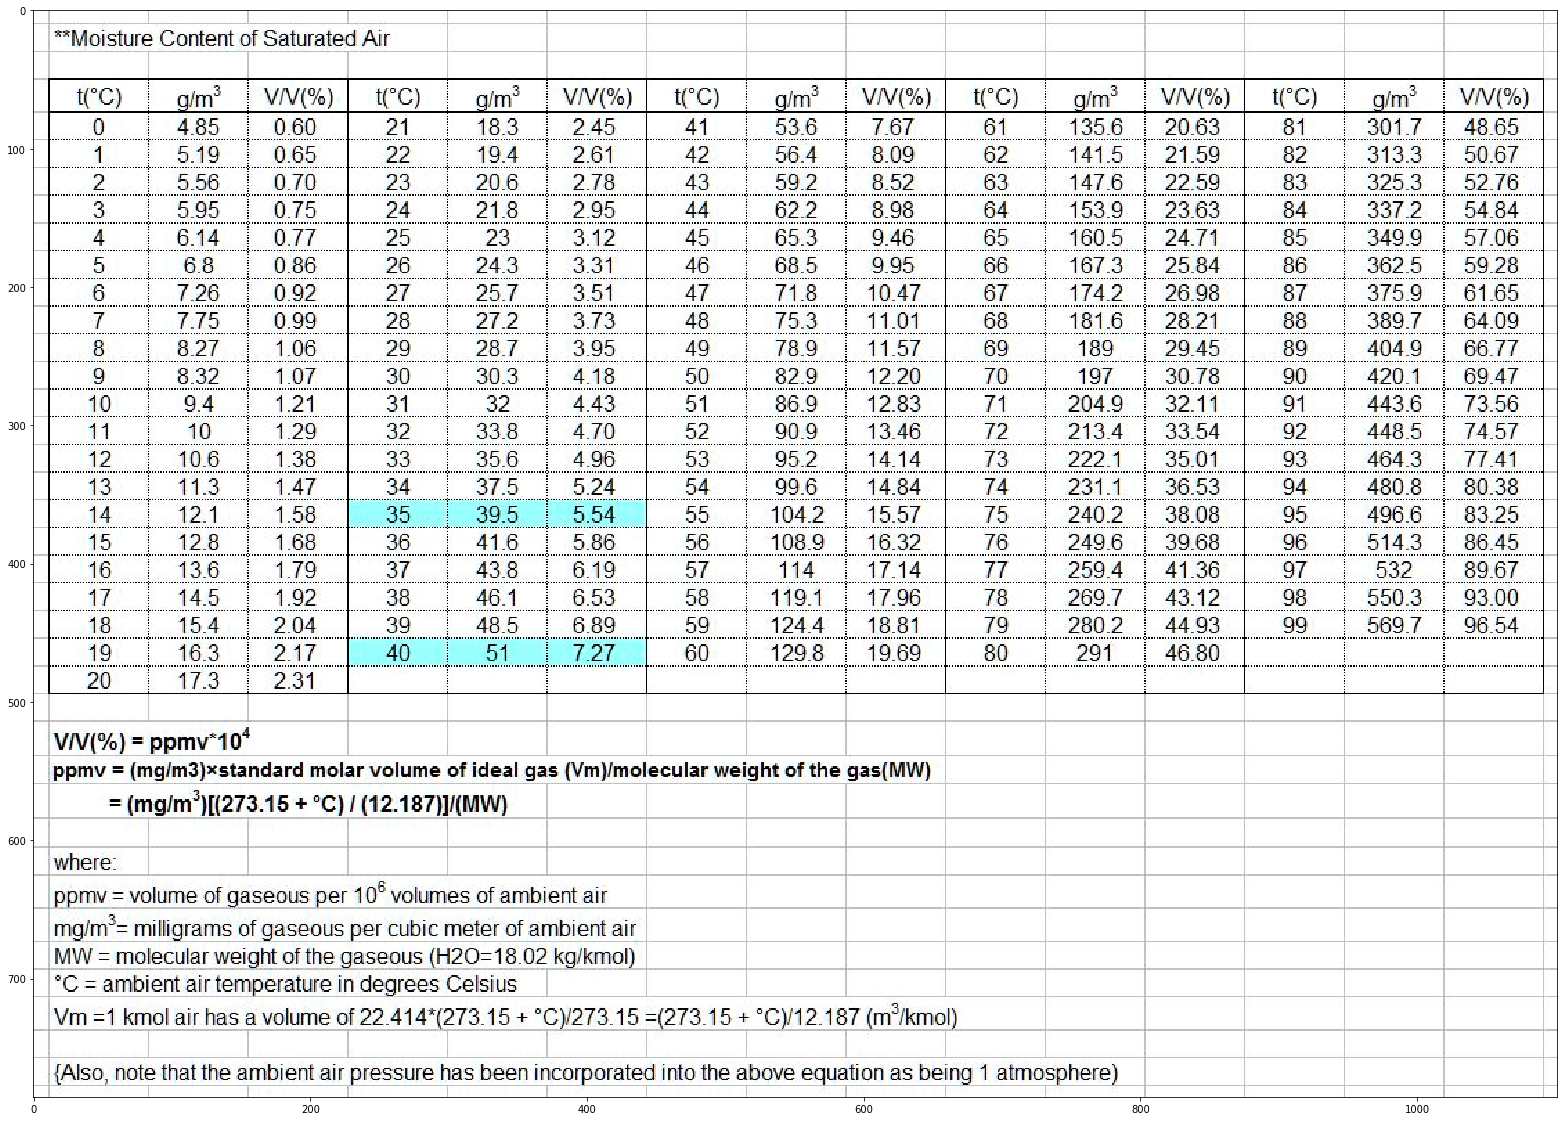

In [10]:
img = cv2.imread("SatWaterContent.JPG")
plt.figure(figsize = (40,20))
plt.imshow(img)
plt.show()

In [11]:
!pip install CoolProp
from CoolProp.HumidAirProp import HAPropsSI

     |████████████████████████████████| 4.0MB 2.8MB/s 


In [0]:
class HAP():
     
    Enthalpy = 0.0
    Humidity_Ratio = 0.0
    Specific_Volume = 0.0
    Wet_Bulb_Temperature = 0.0
    Dew_Point_Temperature = 0.0
    Partial_pressure_of_water_vapor = 0.0
    
    
    def __init__(self,T,P,RH):
        self.Tdb = T+273.15
        self.P = P
        self.RH = RH

    def Set_Prop(self):
        self.Enthalpy = HAPropsSI('H','T',self.Tdb,'P',self.P,'R',self.RH)/1000
        self.Humidity_Ratio = HAPropsSI("W", "T", self.Tdb, "P", self.P, "R",self.RH)
        self.Specific_Volume = HAPropsSI("V", "T", self.Tdb, "P",self.P, "R",self.RH)
        self.Wet_Bulb_Temperature = HAPropsSI("Twb", "T", self.Tdb, "P", self.P, "R",self.RH)-273.15
        self.Dew_Point_Temperature = HAPropsSI("Tdp", "T", self.Tdb, "P", self.P, "R",self.RH)-273.15
        self.Partial_pressure_of_water_vapor = HAPropsSI("P_w", "T", self.Tdb, "P", self.P, "R",self.RH)

In [19]:
'''
Tdb = 80
RH = 100
'''

State = HAP(80,101325,1)
State.Set_Prop()

print("Specific_Volume",State.Specific_Volume, "m3/kg")
print('Humidity_Ratio',State.Humidity_Ratio, "kg-water/kg-da")
print("Moisture Content :", State.Humidity_Ratio/State.Specific_Volume,"kg/m3")

Specific_Volume 1.880912206506531 m3/kg
Humidity_Ratio 0.5529259271424659 kg-water/kg-da
Moisture Content : 0.29396689820490357 kg/m3
